## Installing library for CNN

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

# Creating and givivng parameters to CNN

In [3]:
size_x = 200
size_y = 200
channels = 3
batch_size = 128
num_classes = 2

model = keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (size_x, size_y, channels)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])




# Check CNN and show info about CNN and layers

In [4]:
print(len(model.layers))
print(model.summary())

11
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)     

# Download dataset from gdrive and create a generator

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1. /255)
generator_train = train_datagen.flow_from_directory('/content/gdrive/MyDrive/DATA/train',
        target_size=(200, 200),
        batch_size=32,
        class_mode='binary')

Found 8005 images belonging to 2 classes.


In [ ]:
#val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1. /255)
#generator_val = val_datagen.flow_from_directory('/content/gdrive/MyDrive/DATA/train',
#        target_size=(200, 200),
#        batch_size=16,
#        class_mode='binary')

Found 8005 images belonging to 2 classes.


# TRAIN the model

In [ ]:
history = model.fit(generator_train, epochs = 25)

Epoch 1/25
251/251 [==============================] - 1652s 6s/step - loss: 0.7004 - accuracy: 0.5367
Epoch 2/25
251/251 [==============================] - 33s 132ms/step - loss: 0.5995 - accuracy: 0.6670
Epoch 3/25
251/251 [==============================] - 33s 131ms/step - loss: 0.5113 - accuracy: 0.7368
Epoch 4/25
251/251 [==============================] - 33s 132ms/step - loss: 0.4791 - accuracy: 0.7690
Epoch 5/25
251/251 [==============================] - 33s 130ms/step - loss: 0.4130 - accuracy: 0.8126
Epoch 6/25
251/251 [==============================] - 34s 134ms/step - loss: 0.3424 - accuracy: 0.8505
Epoch 7/25
 46/251 [====>.........................] - ETA: 26s - loss: 0.2758 - accuracy: 0.8802

# Check history and visualisation data from history

In [ ]:
print(history.history.keys())
print(history.history['accuracy'])
print(history.history['loss'])

dict_keys(['loss', 'accuracy'])
[0.5486570596694946, 0.6344784498214722, 0.7113054394721985, 0.7601498961448669, 0.8032479882240295, 0.8376014828681946, 0.8734540939331055, 0.9118050932884216, 0.949406623840332, 0.9716427326202393, 0.9760149717330933, 0.9868832230567932, 0.990131139755249, 0.9881324172019958, 0.9898813366889954, 0.9930043816566467, 0.9913803935050964, 0.9838850498199463, 0.9907557964324951, 0.9945034384727478, 0.9933791160583496, 0.9908807277679443, 0.9950031042098999, 0.9903810024261475, 0.993129312992096, 0.995627760887146, 0.9915053248405457, 0.9895065426826477, 0.9963772892951965, 0.9988756775856018, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.949406623840332, 0.9945034384727478, 0.

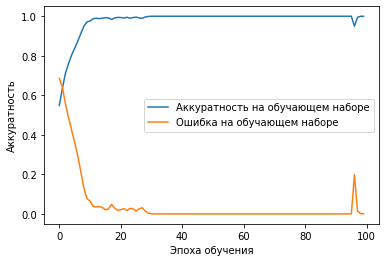

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Accuracy on train data')
plt.plot(history.history['loss'], label='Loss on train data')
#plt.plot(history.history['val_acc'], label='Аккуратность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Аккуратность')
plt.legend()
plt.show()

# Create a test generatot

In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1. /255)
generator_test = test_datagen.flow_from_directory('/content/gdrive/MyDrive/DATA/test',
        target_size=(200, 200),
        batch_size=16,
        class_mode='binary')

Found 2023 images belonging to 2 classes.


In [ ]:
test_history = model.evaluate(generator_test, steps=10, return_dict= True, verbose=1)

10/10 [==============================] - 21s 2s/step - loss: 2.2276 - accuracy: 0.7812


In [ ]:
print(test_history.keys())
print(test_history['accuracy'])
print(test_history['loss'])

dict_keys(['loss', 'accuracy'])
0.8374999761581421
1.6829931735992432


In [ ]:
print(test_history['accuracy']*100)

78.125
